In [86]:
%matplotlib inline
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 


In [3]:
breast_cancer = pd.read_csv("/home/jasp/Documents/python/data.csv")

In [4]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
breast_cancer['id']

0        842302
1        842517
2      84300903
3      84348301
4      84358402
5        843786
6        844359
7      84458202
8        844981
9      84501001
10       845636
11     84610002
12       846226
13       846381
14     84667401
15     84799002
16       848406
17     84862001
18       849014
19      8510426
20      8510653
21      8510824
22      8511133
23       851509
24       852552
25       852631
26       852763
27       852781
28       852973
29       853201
         ...   
539      921362
540      921385
541      921386
542      921644
543      922296
544      922297
545      922576
546      922577
547      922840
548      923169
549      923465
550      923748
551      923780
552      924084
553      924342
554      924632
555      924934
556      924964
557      925236
558      925277
559      925291
560      925292
561      925311
562      925622
563      926125
564      926424
565      926682
566      926954
567      927241
568       92751
Name: id, Length: 569, d

In [7]:
breast_cancer.set_index(['id'],inplace = True)

In [8]:
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M':1,'B':0})

In [9]:
breast_cancer.apply(lambda x:x.isnull().sum())

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [10]:
breast_cancer = breast_cancer.drop(['Unnamed: 32'],axis = 1)

In [11]:
print("la dimension de notre data frame est la suivante:\n",breast_cancer.shape)

la dimension de notre data frame est la suivante:
 (569, 31)


In [12]:
print("le type de chaque colonne de notre data frame:\n",breast_cancer.dtypes)

le type de chaque colonne de notre data frame:
 diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavi

In [13]:

def F(df,col):
    col_val = df[col].value_counts()
    col_val = col_val.reset_index()
    f = lambda x,y:100*(x/sum(y))
    for i in range(0,len(col_val['index'])):
         print(' on a {1:.2f}% pour le label:',col_val['index'][i],f(col_val[col].iloc[i],col_val[col]))
    
F(breast_cancer,'diagnosis')

 on a {1:.2f}% pour le label: 0 62.741652021089635
 on a {1:.2f}% pour le label: 1 37.258347978910365


In [14]:
col_val = breast_cancer['diagnosis'].value_counts()
col_val = col_val.reset_index()
col_val['index']

0    0
1    1
Name: index, dtype: int64

In [15]:
X = breast_cancer.iloc[:,breast_cancer.columns!='diagnosis']
y = breast_cancer.iloc[:,breast_cancer.columns=='diagnosis']

In [16]:
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [17]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [18]:
fit_rf = RandomForestClassifier(random_state = 42)

In [19]:

np.random.seed(42)
start = time.time()
paramt = {'max_depth':[2,3,4],'bootstrap':[True,False],'max_features':['auto','sqrt','log2',None],'criterion':['gini','entropy']}
cv_rf = GridSearchCV(fit_rf,cv = 10, param_grid= paramt,n_jobs=3 )

In [20]:
cv_rf.fit(X_train,y_train)

/home/jasp/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/jasp/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'max_depth': [2, 3, 4], 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt', 'log2', None], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
print("les meilleurs parametres sont:\n",cv_rf.best_params_)

les meilleurs parametres sont:
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2'}


In [22]:
mod1 = fit_rf.set_params(criterion = 'gini',max_features = 'log2',max_depth = 3)

In [23]:
mod1.fit(X_train,y_train)
print("Accuracy pour le jeu d entrainement:{:.3f}".format(mod1.score(X_train,y_train)))
print("Accuracy pour le jeu de test:{:.3f}".format(mod1.score(X_test,y_test)))

Accuracy pour le jeu d entrainement:0.974
Accuracy pour le jeu de test:0.965


/home/jasp/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
#on va essayer de voir le nombre d arbre ou d estimateur souhaitable
fit_rf.set_params(warm_start=True,oob_score=True)
min_estimators = 15
max_estimators = 1000
error_rate = {}
for i in range(min_estimators,max_estimators+1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train,y_train)
    oob_error=1-fit_rf.oob_score_
    error_rate[i]=oob_error
    
    

In [25]:
print(error_rate)

{15: 0.05494505494505497, 16: 0.05274725274725278, 17: 0.0483516483516484, 18: 0.03956043956043953, 19: 0.0461538461538461, 20: 0.05274725274725278, 21: 0.0483516483516484, 22: 0.0461538461538461, 23: 0.05054945054945059, 24: 0.0461538461538461, 25: 0.0483516483516484, 26: 0.05274725274725278, 27: 0.05714285714285716, 28: 0.04395604395604391, 29: 0.04395604395604391, 30: 0.0483516483516484, 31: 0.0461538461538461, 32: 0.0461538461538461, 33: 0.0461538461538461, 34: 0.05274725274725278, 35: 0.05494505494505497, 36: 0.05494505494505497, 37: 0.05274725274725278, 38: 0.05054945054945059, 39: 0.05494505494505497, 40: 0.05714285714285716, 41: 0.05054945054945059, 42: 0.05054945054945059, 43: 0.0483516483516484, 44: 0.05054945054945059, 45: 0.0461538461538461, 46: 0.0461538461538461, 47: 0.0461538461538461, 48: 0.0483516483516484, 49: 0.0483516483516484, 50: 0.0461538461538461, 51: 0.0461538461538461, 52: 0.0483516483516484, 53: 0.0461538461538461, 54: 0.0461538461538461, 55: 0.04835164835164

In [26]:
error_Series = pd.Series(error_rate)
#error_Series
#print(error_Series)

Text(0.5, 1.0, 'taux de OOB erreur')

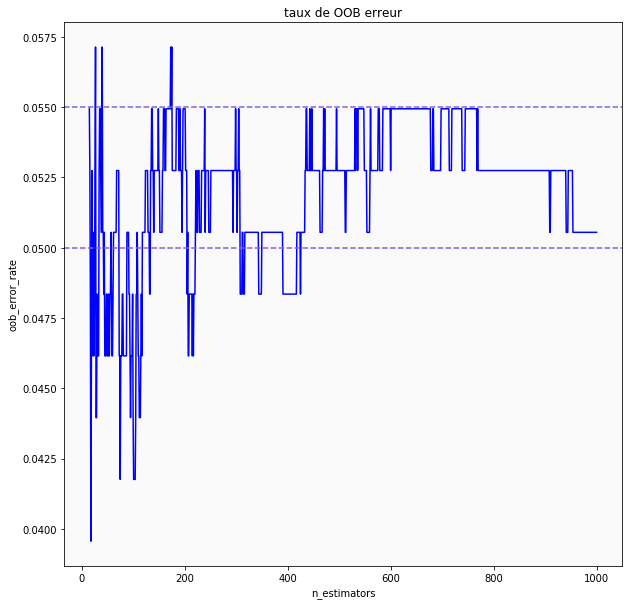

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_facecolor('#fafafa')
error_Series.plot(kind='line',color='blue')
plt.axhline(0.055,color='#875FDB',linestyle='--')
plt.axhline(0.05,color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('oob_error_rate')
plt.title('taux de OOB erreur')

In [28]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(error_Series[400]))

OOB Error rate for 400 trees is: 0.04835


In [29]:
fit_rf.set_params(n_estimators=400,bootstrap=True,warm_start=False,oob_score=False)
fit_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [30]:
def variable_importance(fit):
    try:
        if not hasattr(fit,'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 
        if not vars(fit)["estimators"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")
    importances = fit.feature_importances_
    indices = np.argsort(importances)[::1]
    return {'importance':importances,'index':indices}


In [31]:
var_imp_rf = variable_importance(fit_rf)
var_imp_rf

Model entered does not contain 'estimators_' attribute.


{'importance': array([0.05456676, 0.01220341, 0.0517447 , 0.05655574, 0.0039823 ,
        0.01616258, 0.06214337, 0.10013643, 0.00205084, 0.00221035,
        0.01452134, 0.0020427 , 0.01308397, 0.04326111, 0.0021689 ,
        0.00098706, 0.00910497, 0.00444908, 0.00193667, 0.00395259,
        0.07804653, 0.01554211, 0.12095345, 0.12985601, 0.00937971,
        0.02032924, 0.03865873, 0.11554756, 0.01174973, 0.00267207]),
 'index': array([15, 18, 11,  8, 14,  9, 29, 19,  4, 17, 16, 24, 28,  1, 12, 10, 21,
         5, 25, 26, 13,  2,  0,  3,  6, 20,  7, 27, 22, 23])}

In [32]:
importances_rf = var_imp_rf['importance']
indices_rf = var_imp_rf['index']
indices_rf.shape[0]

30

In [35]:
def print_var_imp(importance, indices, name_index):
    print("Feature ranking:")
    for f in range(0,indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      name_index[indices[i]],
                      importance[indices[f]]))
        

In [47]:
names = list(breast_cancer)
names

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [48]:
print_var_imp(importances_rf, indices_rf, names)

Feature ranking:
1. The feature 'smoothness_se' has a Mean Decrease in Impurity of 0.00099
2. The feature 'concave points_se' has a Mean Decrease in Impurity of 0.00194
3. The feature 'radius_se' has a Mean Decrease in Impurity of 0.00204
4. The feature 'concave points_mean' has a Mean Decrease in Impurity of 0.00205
5. The feature 'area_se' has a Mean Decrease in Impurity of 0.00217
6. The feature 'symmetry_mean' has a Mean Decrease in Impurity of 0.00221
7. The feature 'symmetry_worst' has a Mean Decrease in Impurity of 0.00267
8. The feature 'symmetry_se' has a Mean Decrease in Impurity of 0.00395
9. The feature 'area_mean' has a Mean Decrease in Impurity of 0.00398
10. The feature 'concavity_se' has a Mean Decrease in Impurity of 0.00445
11. The feature 'compactness_se' has a Mean Decrease in Impurity of 0.00910
12. The feature 'area_worst' has a Mean Decrease in Impurity of 0.00938
13. The feature 'concave points_worst' has a Mean Decrease in Impurity of 0.01175
14. The feature 'r

In [66]:
def variable_import_plot(importance,indices,name_index):
    index = np.arange(len(name_index))
    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(name_index[indices[i]])
    fig, ax = plt.subplots(figsize=(0, 10))
    ax.set_facecolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\
    \nBreast Cancer (Diagnostic)')
    plt.barh(index,importance_desc,align="center",color = '#875FDB')
    plt.yticks(index,feature_space)
    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')
    plt.show()
    plt.close()
    

In [67]:
variable_import_plot(importances_rf,indices_rf,names)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

/home/jasp/.local/lib/python3.6/site-packages/matplotlib/axis.py:1081: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/jasp/.local/lib/python3.6/site-packages/matplotlib/axis.py:1091: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/jasp/.local/lib/python3.6/site-packages/matplotlib/axis.py:1081: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/jasp/.local/lib/python3.6/site-packages/matplotlib/axis.py:1091: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance a

RuntimeError: libpng signaled error

<Figure size 0x720 with 1 Axes>

In [74]:
def cross_val_metrics(fit,training_set,class_set,estimator,print_results = True):
    try:
        # Captures whether first parameter is a model
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)['estimators_']:
            return print("Model does not appear to be trained.")

    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary.\\nnPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise
    
    n = KFold(n_splits = 10)
    scores = cross_val_score(fit,training_set,class_set,cv=n)
    if print_results:
        for i in range(0, len(scores)):
            print("Cross validation run {0}: {1: 0.3f}".format(i, scores[i]))
        print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})".format(scores.mean(), scores.std() / 2))

In [78]:
cross_val_metrics(fit_rf,X_train,y_train,'rf',print_results = True)

Cross validation run 0:  1.000
Cross validation run 1:  0.957
Cross validation run 2:  0.935
Cross validation run 3:  0.935
Cross validation run 4:  0.957
Cross validation run 5:  0.978
Cross validation run 6:  0.933
Cross validation run 7:  0.889
Cross validation run 8:  1.000
Cross validation run 9:  0.889
Accuracy:  0.947 (+/-  0.019)


In [80]:
predictions_rf = fit_rf.predict(X_test)
predictions_rf

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

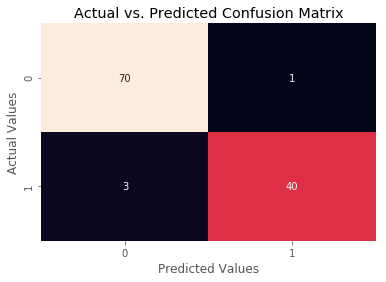

In [88]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()


In [91]:
accuracy_rf = fit_rf.score(X_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}".format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.965


In [92]:
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.0351
